# ARBRES DES DECISION - Calcule GINI et Entropy
- Homework
- Author: Ricardo Vallejo

#  DEVOIR 1 - Excercise 1 MOVIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy.stats
import seaborn as sns

data = pd.read_excel("MoviesArbre.xlsx")
pd.set_option('display.max_rows', None)
display(data)

,MovieID,Format,CategoryMovie,Class
0,1,DVD,Enterteinment,C0
1,2,DVD,Comedy,C0
2,3,DVD,Documentaries,C0
3,4,DVD,Comedy,C0
4,5,DVD,Comedy,C0
5,6,DVD,Comedy,C0
6,7,Online,Comedy,C0
7,8,Online,Comedy,C0
8,9,Online,Comedy,C0
9,10,Online,Documentaries,C0


In [2]:
# Identification de classes et features

fn = ['MovieID','Format', 'CategoryMovie'] # Features ou characteristics - MovieID shouldn be 
                                           # included because doent mean anything 
cn = ['C0', 'C1'] # Classes


In [3]:
data.groupby('Class').size()  # In order to know each class

Class
C0    10
C1    10
dtype: int64

  
  
## (a) Calcule de GINI DATASET


In [4]:

# GINI = 1 - $P^2(i)
# P(i) = ocurrence de class

P_co = 10 / 20 
P_c1 = 10 / 20

Gini_Dataset = 1 - ( pow(P_co,2) + pow(P_c1,2) )

print("GiniDataset: ", Gini_Dataset)


GiniDataset:  0.5


## (c) GINI for variable FORMAT

In [5]:
print(data.groupby('Format').size())  #Class species ALL DATA
#P_dvd = 1 - [ (6/8)^2 + (2/8)^2 ]    #Ocurrencies de C0 y C1 dans le group DVD
#P_onl = 1 - [ (4/12)^2 + (8/12)^2 ]  #Ocurrencies de C0 y C1 dans le group Online

Pdvd = 1 - ( pow((6/8),2) + pow((2/8),2) )
Ponl = 1 - ( pow((4/12),2) + pow((8/12),2) )

print("Gini_Format_dvd: ", Ponl)
print("Gini_Format_online: ", Pdvd)

print("Gini_Format: ", (8/20)*Pdvd + (12/20)*Ponl )

Format
DVD        8
Online    12
dtype: int64
Gini_Format_dvd:  0.4444444444444444
Gini_Format_online:  0.375
Gini_Format:  0.4166666666666667


## (e) (b) (f) GINI pour variable MovieID

In [6]:
# Dans le cas de GINI Movie ID n'est pas representative, mais on va le faire pour excercise

# Pi = 1 - ( (1/1)^2) ) = 0
# Gini_MovieId = 1/20 * (0) * 20 = 0


L'attribute avec l'indice GINI plus bas est MovieId = 0, ca veut dire que cest pure 

Gini Index is 0. This happens when the node is pure. All the contained elements in the node are of one unique class.
Therefore, this node will not be split again.

La variable avec plus grande GINI est FORMAT, donc cest a choisir en premiere comme node.


## GINI pour variable CATEGORIE

In [7]:
# GINI for MOVIE CATEGORIE

print(data.groupby('CategoryMovie').size())  #Class species ALL DATA
#P_com = 1 - [ (7/8)^2 + (1/8)^2 ]    #Ocurrencies de C0 y C1 dans le group comedy
#P_doc = 1 - [ (2/8)^2 + (6/8)^2 ]  #Ocurrencies de C0 y C1 dans le group documentary
#P_ent = 1 - [ (2/4)^2 + (2/4)^2 ]  #Ocurrencies de C0 y C1 dans le group enterteinment


Pcom = 1 - ( pow((7/8),2) + pow((1/8),2) )
Pdoc = 1 - ( pow((2/8),2) + pow((6/8),2) )
Pent = 1 - ( pow((2/4),2) + pow((2/4),2) )

print("Gini_Categorie_comedy: ", Pcom)
print("Gini_Categorie_documentary: ", Pdoc)
print("Gini_Categorie_enterteinment: ", Pent)

print("Gini_Categorie: ", (8/20)*Pcom + (8/20)*Pdoc+ (4/20)*Pent)

CategoryMovie
Comedy           8
Documentaries    8
Enterteinment    4
dtype: int64
Gini_Categorie_comedy:  0.21875
Gini_Categorie_documentary:  0.375
Gini_Categorie_enterteinment:  0.5
Gini_Categorie:  0.3375


## Verification avec model Python

- Convert Categorical String Data in numerical values

In [8]:
data.loc[data['Format'] == 'DVD', 'FormatNumber'] = 1
data.loc[data['Format'] == 'Online', 'FormatNumber'] = 2

data.loc[data['CategoryMovie'] == 'Enterteinment', 'CategoryNumber'] = 1
data.loc[data['CategoryMovie'] == 'Comedy', 'CategoryNumber'] = 2
data.loc[data['CategoryMovie'] == 'Documentaries', 'CategoryNumber'] = 2

data.loc[data['Class'] == 'C0', 'ClassNumber'] = 0
data.loc[data['Class'] == 'C1', 'ClassNumber'] = 1

display(data)

,MovieID,Format,CategoryMovie,Class,FormatNumber,CategoryNumber,ClassNumber
0,1,DVD,Enterteinment,C0,1.0,1.0,0.0
1,2,DVD,Comedy,C0,1.0,2.0,0.0
2,3,DVD,Documentaries,C0,1.0,2.0,0.0
3,4,DVD,Comedy,C0,1.0,2.0,0.0
4,5,DVD,Comedy,C0,1.0,2.0,0.0
5,6,DVD,Comedy,C0,1.0,2.0,0.0
6,7,Online,Comedy,C0,2.0,2.0,0.0
7,8,Online,Comedy,C0,2.0,2.0,0.0
8,9,Online,Comedy,C0,2.0,2.0,0.0
9,10,Online,Documentaries,C0,2.0,2.0,0.0


## Aplique l'algorithme en incluant MovieId

In [9]:
from sklearn import tree
desicionTree = tree.DecisionTreeClassifier(max_depth =4, criterion='gini', random_state=44, min_samples_leaf=2)
desicionTree.fit(data[['MovieID', 'FormatNumber', 'CategoryNumber']], data['ClassNumber'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=44, splitter='best')

[Text(167.4, 326.15999999999997, 'MovieID <= 10.5\ngini = 0.5\nsamples = 20\nvalue = [10, 10]\nclass = C0'),
 Text(83.7, 108.72000000000003, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]\nclass = C0'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]\nclass = C1')]

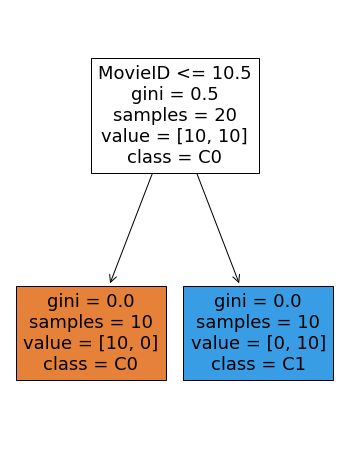

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize = (6,8))
plot_tree(desicionTree, feature_names = ['MovieID', 'FormatNumber', 'CategoryNumber'], class_names = ['C0', 'C1'], filled = True)


Le methode trouve erroneement que le plus petite ou meilleur gini est MovieId, cest pas une bonne conclusion on dois eliminer cetter variable de model.


## Appliquer le model sans MovieId

[Text(279.0, 362.4, 'FormatNumber <= 1.5\ngini = 0.5\nsamples = 20\nvalue = [10, 10]\nclass = C0'),
 Text(139.5, 217.44, 'CategoryNumber <= 1.5\ngini = 0.375\nsamples = 8\nvalue = [6, 2]\nclass = C0'),
 Text(69.75, 72.47999999999996, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = C0'),
 Text(209.25, 72.47999999999996, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = C0'),
 Text(418.5, 217.44, 'CategoryNumber <= 1.5\ngini = 0.444\nsamples = 12\nvalue = [4, 8]\nclass = C1'),
 Text(348.75, 72.47999999999996, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = C1'),
 Text(488.25, 72.47999999999996, 'gini = 0.48\nsamples = 10\nvalue = [4, 6]\nclass = C1')]

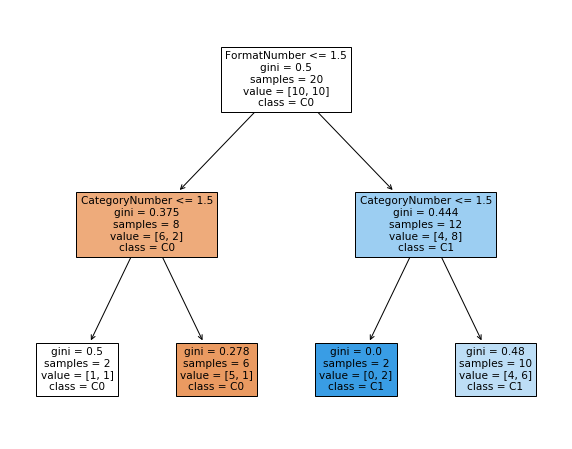

In [11]:
from sklearn import tree
desicionTree = tree.DecisionTreeClassifier(max_depth =3, criterion='gini', random_state=44, min_samples_leaf=2)
desicionTree.fit(data[['FormatNumber', 'CategoryNumber']], data['ClassNumber'])
plt.figure(figsize = (10,8))
plot_tree(desicionTree, feature_names = ['FormatNumber', 'CategoryNumber'], class_names = ['C0', 'C1'], filled = True)



#  DEVOIR 2. EXCERCISE 2 -  BREAST.DATA

##  Load data

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy.stats
import seaborn as sns

Data = pd.read_csv("breast.csv")
pd.set_option('display.max_rows', None)
#display(Data)
Data.head()



,id_number,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Exploration de donnes

In [13]:
Data.info() # En observation des donnes, dans la column Bare_Nuclei, ilya des valeurs non-numeriques, que pour 
            # l'instante on va a eliminer les lignes correspondentes.  La Column continue a etre consideree dan la analyses.
            # La column Id Number est pas representative de la sortie.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id_number                    699 non-null    int64 
 1   Clump_Thickness              699 non-null    int64 
 2   Uniformity_Cell_Size         699 non-null    int64 
 3   Uniformity_Cell_Shape        699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


## Cleaning invalid data

In [14]:
labels = ['id_number' 'Clump_Thickness','Uniformity_Cell_Size','Uniformity_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class']

# Dont use IdNumber ni 'Class'
fn = ['Clump_Thickness','Uniformity_Cell_Size','Uniformity_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses']


In [15]:
# The data contain "?" values, we erase non numerical rows with values from data

df = Data.apply (pd.to_numeric, errors='coerce')
Data2 = df.dropna()
Data2 = Data2.reset_index(drop=True)
Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_number                    683 non-null    int64  
 1   Clump_Thickness              683 non-null    int64  
 2   Uniformity_Cell_Size         683 non-null    int64  
 3   Uniformity_Cell_Shape        683 non-null    int64  
 4   Marginal_Adhesion            683 non-null    int64  
 5   Single_Epithelial_Cell_Size  683 non-null    int64  
 6   Bare_Nuclei                  683 non-null    float64
 7   Bland_Chromatin              683 non-null    int64  
 8   Normal_Nucleoli              683 non-null    int64  
 9   Mitoses                      683 non-null    int64  
 10  Class                        683 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 58.8 KB


## On separe Xi et y - Features et Target. 
On a pris tout la donnes comme training set.

In [16]:
X_train = Data2[fn] # Not columns Class et IdNumber
X_train.head()


,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [17]:
Y_train = Data2['Class']
Y_train.head()


0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [18]:
Data.groupby('Class').size()  #To know frequency of any class in target Column

Class
2    458
4    241
dtype: int64

## Arbre de decision - Entropy


In [19]:
from sklearn import tree
desicionTree = tree.DecisionTreeClassifier(max_depth =3, criterion='entropy', random_state=44, min_samples_leaf=5)
desicionTree.fit(X_train, Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=44, splitter='best')

## Prediction

In [20]:
# Pour les données X suivantes ([4,2,1,1,1,2,3,2,1]), prédire la cible

In [21]:
fn = ['Clump_Thickness','Uniformity_Cell_Size','Uniformity_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses']
cn = ['2', '4']
X_prediction = [[4,2,1,1,1,2,3,2,1]]

In [22]:
Y_prediction = desicionTree.predict(X_prediction)
print(Y_prediction)

[2]


In [23]:
# La prediction cest que appartient a la class 2

[Text(362.7, 475.65000000000003, 'Uniformity_Cell_Size <= 2.5\nentropy = 0.934\nsamples = 683\nvalue = [444, 239]\nclass = 2'),
 Text(181.35, 339.75, 'Bare_Nuclei <= 3.5\nentropy = 0.188\nsamples = 418\nvalue = [406, 12]\nclass = 2'),
 Text(90.675, 203.85000000000002, 'Bland_Chromatin <= 4.5\nentropy = 0.046\nsamples = 395\nvalue = [393, 2]\nclass = 2'),
 Text(45.3375, 67.94999999999999, 'entropy = 0.0\nsamples = 389\nvalue = [389, 0]\nclass = 2'),
 Text(136.0125, 67.94999999999999, 'entropy = 0.918\nsamples = 6\nvalue = [4, 2]\nclass = 2'),
 Text(272.025, 203.85000000000002, 'Clump_Thickness <= 3.5\nentropy = 0.988\nsamples = 23\nvalue = [13, 10]\nclass = 2'),
 Text(226.6875, 67.94999999999999, 'entropy = 0.0\nsamples = 11\nvalue = [11, 0]\nclass = 2'),
 Text(317.3625, 67.94999999999999, 'entropy = 0.65\nsamples = 12\nvalue = [2, 10]\nclass = 4'),
 Text(544.05, 339.75, 'Uniformity_Cell_Size <= 4.5\nentropy = 0.593\nsamples = 265\nvalue = [38, 227]\nclass = 4'),
 Text(453.375, 203.8500

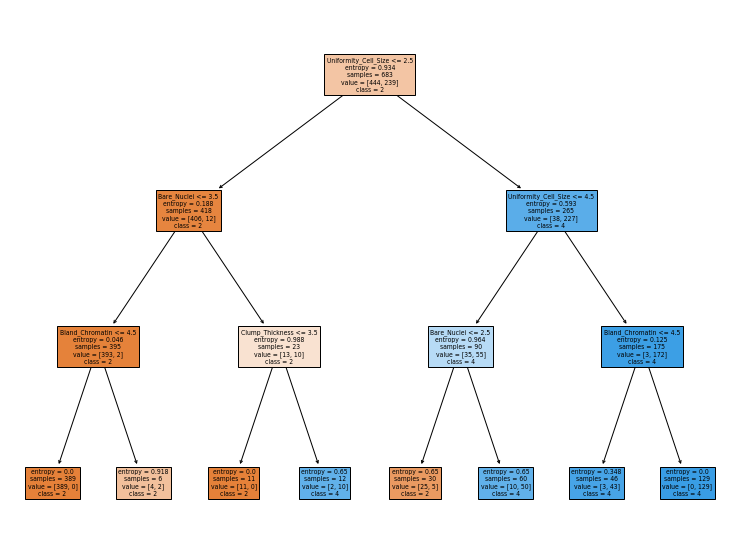

In [24]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# https://quantdare.com/decision-trees-gini-vs-entropy/
# https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8

plt.figure(figsize = (13,10))
plot_tree(desicionTree, feature_names = fn, class_names = cn, filled = True)


## Arbre de decision - GINI Methode

In [25]:
from sklearn import tree
desicionTree = tree.DecisionTreeClassifier(max_depth =3, criterion='gini', random_state=44, min_samples_leaf=5)
desicionTree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=44, splitter='best')

[Text(358.05000000000007, 380.52, 'Uniformity_Cell_Size <= 2.5\ngini = 0.455\nsamples = 683\nvalue = [444, 239]\nclass = 2'),
 Text(195.3, 271.8, 'Bare_Nuclei <= 5.5\ngini = 0.056\nsamples = 418\nvalue = [406, 12]\nclass = 2'),
 Text(130.20000000000002, 163.07999999999998, 'Clump_Thickness <= 6.5\ngini = 0.024\nsamples = 410\nvalue = [405, 5]\nclass = 2'),
 Text(65.10000000000001, 54.360000000000014, 'gini = 0.01\nsamples = 405\nvalue = [403, 2]\nclass = 2'),
 Text(195.3, 54.360000000000014, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]\nclass = 4'),
 Text(260.40000000000003, 163.07999999999998, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]\nclass = 4'),
 Text(520.8000000000001, 271.8, 'Uniformity_Cell_Shape <= 2.5\ngini = 0.246\nsamples = 265\nvalue = [38, 227]\nclass = 4'),
 Text(390.6, 163.07999999999998, 'Bland_Chromatin <= 3.5\ngini = 0.34\nsamples = 23\nvalue = [18, 5]\nclass = 2'),
 Text(325.50000000000006, 54.360000000000014, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]\nclass = 2'),
 T

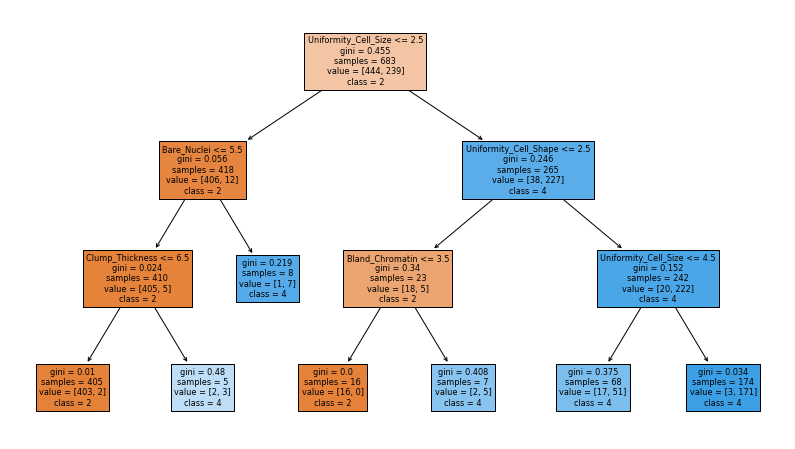

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# https://quantdare.com/decision-trees-gini-vs-entropy/
# https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8

plt.figure(figsize = (14,8))
plot_tree(desicionTree, feature_names = fn, class_names = cn, filled = True)


## Prediction

In [27]:
Y_prediction = desicionTree.predict(X_prediction)
print(Y_prediction)

[2]


Les deux methodes ont le meme resultat de prediction - C2

In [28]:
# https://www.kdnuggets.com/2019/08/understanding-decision-trees-classification-python.html

# DEVOIR 2 - Excercise 1 - Prediction Achat d'ordinateur - Gain et Entropie

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy.stats
import seaborn as sns

data3 = pd.read_excel("CreditOrdinateur.xlsx")
pd.set_option('display.max_rows', None)
display(data3)

,Age,Revenu,StatutEtudiant,Credit,AchatOrdinateur
0,<=30,Élevé,Non,Bon,Non
1,<=30,Élevé,Non,Excellent,Non
2,31-40,Élevé,Non,Bon,Oui
3,>40,Moyen,Non,Bon,Oui
4,>40,Bas,Oui,Bon,Oui
5,>40,Bas,Oui,Excellent,Non
6,31-40,Bas,Oui,Excellent,Oui
7,<=30,Moyen,Non,Bon,Non
8,30,Bas,Oui,Bon,Oui
9,>30,Moyen,Oui,Bon,Oui


# ENTROPIE

#  Calcules de Entropie - Age

In [30]:
data3.groupby('Age').size()  #Class species ALL DATA

Age
30       1
31-40    4
<=30     4
>30      1
>40      4
dtype: int64

In [31]:
# On peut identifier dans Age trois categories differents, pour calculer la entropie on dois 

#P1: <= 30  Achat Non  3
#P2: <= 30  Achat Oui  2

#P3: 31-40 Achat Non 0
#P4: 31-40 Achat Oui 4

#P5: >40 Achat Non 2
#P6: >40 Achat Oui 2

# Calcule les Ej:
import math
E1 = (3/5)*math.log((3/5),2) + (2/5)*math.log((2/5),2) 
E2 = 0 + (4/4)*math.log((4/4),2) 
E3 = (2/4)*math.log((2/4),2) + (2/4)*math.log((2/4),2) 
    
print('Entropies for AGE')
print('E1: ', -E1)
print('E2: ', -E2)
print('E3: ', -E3)

EAge = (5/14)*-E1 + (4/14)*-E2 + (4/14)*-E3
print('Age Entropie: ', EAge)

Entropies for AGE
E1:  0.9709505944546686
E2:  -0.0
E3:  1.0
Age Entropie:  0.6324823551623816


# Calcules de Entropie - Revenu


In [32]:
data3.groupby('Revenu').size()

Revenu
Bas      4
Moyen    6
Élevé    3
élevé    1
dtype: int64

In [33]:
#P1: Bas  Achat Non  1
#P2: Bas  Achat Oui  3

#P3: Moy Achat Non 2
#P4: Moy Achat Oui 4

#P5: elv Achat Non 2
#P6: elv Achat Oui 2

# Calcule les Ej:
import math
E1 = (1/4)*math.log((1/4),2) + (3/4)*math.log((3/4),2) 
E2 = (2/6)*math.log((2/6),2) + (4/6)*math.log((4/6),2)  
E3 = (2/4)*math.log((2/4),2) + (2/4)*math.log((2/4),2) 
    
print('Entropies for Revenu')
print('E1: ', -E1)
print('E2: ', -E2)
print('E3: ', -E3)

ERevenu = (4/14)*-E1 + (6/14)*-E2 + (4/14)*-E3
print('Revenu Entropie: ', ERevenu)

Entropies for Revenu
E1:  0.8112781244591328
E2:  0.9182958340544896
E3:  1.0
Revenu Entropie:  0.9110633930116763


# Calcules de Entropie - StatutEtudiant


In [34]:
data3.groupby('StatutEtudiant').size()

StatutEtudiant
Non    7
Oui    7
dtype: int64

In [35]:
#P1: Oui  Achat Non  1
#P2: Oui  Achat Oui  6

#P3: Non Achat Non 4
#P4: Non Achat Oui 3


# Calcule les Ej:
import math
E1 = (1/7)*math.log((1/7),2) + (6/7)*math.log((6/7),2) 
E2 = (3/7)*math.log((3/7),2) + (4/7)*math.log((4/7),2)  

    
print('Entropies for StatutEtudiant')
print('E1: ', -E1)
print('E2: ', -E2)

EStatus = (7/14)*-E1 + (7/14)*-E2
print('StatutEtudiant Entropie: ', EStatus)

Entropies for StatutEtudiant
E1:  0.5916727785823275
E2:  0.9852281360342516
StatutEtudiant Entropie:  0.7884504573082896


# Calcules de Entropie - Credit

In [36]:
data3.groupby('Credit').size()

Credit
Bon          8
Excellent    6
dtype: int64

In [37]:
#P1: Bon  Achat Non  2
#P2: Bon  Achat Oui  6

#P3: Exc Achat Non 3
#P4: Exc Achat Oui 3


# Calcule les Ej:
import math
E1 = (2/8)*math.log((2/8),2) + (6/8)*math.log((6/8),2) 
E2 = (3/6)*math.log((3/6),2) + (3/6)*math.log((3/6),2)  

    
print('Entropies for Credit')
print('E1: ', -E1)
print('E2: ', -E2)

ECredit = (7/14)*-E1 + (7/14)*-E2
print('Credit Entropie: ', ECredit)

Entropies for Credit
E1:  0.8112781244591328
E2:  1.0
Credit Entropie:  0.9056390622295665


# GINI

## GINI - Age


In [38]:
#P1: <= 30  Achat Non  3
#P1: <= 30  Achat Oui  2

#P2: 31-40 Achat Non 0
#P2: 31-40 Achat Oui 4

#P3: >40 Achat Non 2
#P3: >40 Achat Oui 2

# Calcule les Pj:

P1 = 1 - ( pow((3/5),2) + pow((2/5),2) )
P2 = 1 - ( pow((0/4),2) + pow((4/4),2) )
P3 = 1 - ( pow((2/4),2) + pow((2/4),2) )

print("Gini_Age_<=30: ", P1)
print("Gini_Age_31-40: ", P2)
print("Gini_Age_>40: ", P3)
Gini_Age = (5/14)*P1 + (4/14)*P2 + (4/14)*P3
print("Gini_Age: ", Gini_Age )

Gini_Age_<=30:  0.48
Gini_Age_31-40:  0.0
Gini_Age_>40:  0.5
Gini_Age:  0.3142857142857143


# Gini - Revenu

In [39]:
#P1: Bas  Achat Non  1
#P1: Bas  Achat Oui  3

#P2: Moy Achat Non 2
#P2: Moy Achat Oui 4

#P3: elv Achat Non 2
#P3: elv Achat Oui 2

# Calcule les Pj:

P1 = 1 - ( pow((1/4),2) + pow((3/4),2) )
P2 = 1 - ( pow((2/6),2) + pow((4/6),2) )
P3 = 1 - ( pow((2/4),2) + pow((2/4),2) )


print("Gini_Bas: ", P1)
print("Gini_Moy: ", P2)
print("Gini_Eleve: ", P3)
Gini_Revenu=(4/14)*P1 + (6/14)*P2 + (4/14)*P3
print("Gini_Revenu: ", -Gini_Revenu)




Gini_Bas:  0.375
Gini_Moy:  0.4444444444444444
Gini_Eleve:  0.5
Gini_Revenu:  -0.44047619047619047


# Gini- StatutEtudiant

In [40]:
#P1: Oui  Achat Non  1
#P1: Oui  Achat Oui  6

#P2: Non Achat Non 4
#P2: Non Achat Oui 3

# Calcule les Pj:

P1 = 1 - ( pow((1/7),2) + pow((6/7),2) )
P2 = 1 - ( pow((4/7),2) + pow((3/7),2) )

print('Gini_StatutOUI: ', P1)
print('Gini_StatutNON: ', P2)
Gini_StatutEtudiant= (7/14)*P1 + (7/14)*P2
print('Gini_StatutEtudiant: ', Gini_StatutEtudiant)



Gini_StatutOUI:  0.24489795918367352
Gini_StatutNON:  0.48979591836734704
Gini_StatutEtudiant:  0.3673469387755103


# Gini - Credit

In [41]:
#P1: Bon  Achat Non  2
#P1: Bon  Achat Oui  6

#P2: Exc Achat Non 3
#P2: Exc Achat Oui 3

# Calcule les Pj:

P1 = 1 - ( pow((2/8),2) + pow((6/8),2) )
P2 = 1 - ( pow((3/6),2) + pow((3/6),2) )

print('Gini_CreditBon: ', P1)
print('Gini_CreditExc: ', P2)
Gini_Credit = (8/14)*P1 + (6/14)*P2
print('Gini_Credit: ',Gini_Credit)


Gini_CreditBon:  0.375
Gini_CreditExc:  0.5
Gini_Credit:  0.42857142857142855


# GAIN

In [42]:
# GINI = 1 - $P^2(i)
# P(i) = ocurrence de class

H_T = -(5/14) *math.log((5/14),2) - (9/14)*math.log((9/14),2) 

print("GiniDataset: ", H_T)

GiniDataset:  0.9402859586706309


In [43]:
GAINAge = H_T - EAge
GAINRevenu = H_T - ERevenu
GAINStatus = H_T - EStatus
GAINCredit = H_T - ECredit

print ("GAIN Age:  ", GAINAge)
print ("GAIN Revenu: ", GAINRevenu )
print ("GAIN Status: ", GAINStatus)
print ("GAIN Credit: ", GAINCredit)

print("\n")

print ("Gini_Age:  ", Gini_Age)
print ("Gini_Revenu: ", Gini_Revenu )
print ("Gini_StatutEtudiant: ", Gini_StatutEtudiant)
print ("Gini_Credit: ", Gini_Credit)

print("\n")

print ("Entropie Age:  ", EAge)
print ("Entropie Revenu: ", ERevenu )
print ("Entropie Status: ", EStatus)
print ("Entropie Credit: ", ECredit)


GAIN Age:   0.3078036035082493
GAIN Revenu:  0.029222565658954647
GAIN Status:  0.15183550136234136
GAIN Credit:  0.034646896441064445


Gini_Age:   0.3142857142857143
Gini_Revenu:  0.44047619047619047
Gini_StatutEtudiant:  0.3673469387755103
Gini_Credit:  0.42857142857142855


Entropie Age:   0.6324823551623816
Entropie Revenu:  0.9110633930116763
Entropie Status:  0.7884504573082896
Entropie Credit:  0.9056390622295665


La premiere variable pour Grande Gini est REVENU, aussi que la plus grand Entropie, pour tante est notre premiere node.
Le status de etudiant cest le descriptor moins elegible.